## COVID-19 District Analysis:
Here you can analyse COVID-19 in any district of India. Data is from: [covid19india.org](https://www.covid19india.org) and you can download csv file from this [API link](https://https://api.covid19india.org/csv/latest/districts.csv). If there is any problem in visualization you can check all the district names [here](https://drive.google.com/file/d/1AkbDTghdlIzSb_PZPiaz0P0WIVhiNqCC/view?usp=sharing). You just need to input the name of the district after running the following cell.

In [10]:
DTNAME = input('Enter District name:')

Enter District name:Delhi


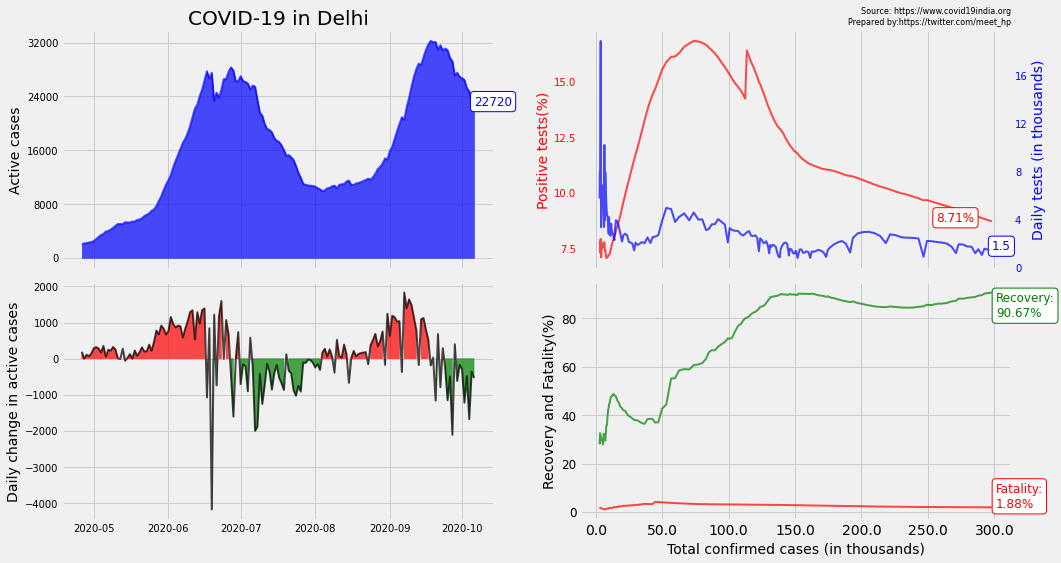

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.style.use('fivethirtyeight')
 
def to_thousands(x, pos):
    return (x/1000)

#Loading data 
df = pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv', parse_dates=['Date'], index_col='Date')
 
#Getting district data
state_df = df.loc[df['District'] == DTNAME, :]
 
######################## Data Processing #########################
#ax1
active = state_df['Confirmed'] - (state_df['Recovered'] + state_df['Deceased'])
active = active.drop(active.tail(2).index)
 
#ax2
daily_conf = state_df['Confirmed'].shift(-1) - state_df['Confirmed']
daily_conf.drop(daily_conf.tail(2).index, inplace=True)
daily_recv = state_df['Recovered'].shift(-1) - state_df['Recovered']
daily_recv.drop(daily_recv.tail(2).index, inplace=True)
daily_death = state_df['Deceased'].shift(-1) - state_df['Deceased']
daily_death.drop(daily_death.tail(2).index, inplace=True)
change = daily_conf - (daily_recv + daily_death)
 
#ax3
daily_positive = state_df['Confirmed'] / state_df['Tested'] * 100
 
#ax31
daily_test = (state_df['Tested'].shift(-1) - state_df['Tested']) / state_df['Tested'].shift(-1)*100
daily_test.drop(daily_test.tail(2).index, inplace=True)
 
#ax3, ax31, ax4
total_conf = state_df['Confirmed']
total_conf = total_conf.drop(total_conf.tail(2).index)
 
#ax4
r_rate = (state_df['Recovered'] / state_df['Confirmed'])*100
f_rate = (state_df['Deceased'] / state_df['Confirmed'])*100
 
###################### Data Visualization #########################
#Defining axes
fig, axes = plt.subplots(figsize=(16,8))
 
ax1 = plt.subplot2grid((4,2),(0,0), rowspan=2, colspan=1)
plt.ylabel('Active cases', fontsize=14)
plt.title('COVID-19 in '+DTNAME)
 
ax2 = plt.subplot2grid((4,2),(2,0), rowspan=2, colspan=1, sharex=ax1)
plt.ylabel('Daily change in active cases', fontsize=14)
 
ax3 = plt.subplot2grid((4,2),(0,1), rowspan=2, colspan=1)
plt.title('Source: https://www.covid19india.org\nPrepared by:https://twitter.com/meet_hp', fontsize=8, loc='right')
plt.ylabel('Positive tests(%)', fontsize=14, color='r')
 
ax31 = ax3.twinx()
ax31.set_ylabel('Daily tests (in thousands)', fontsize=14, color='b')
 
ax4 = plt.subplot2grid((4,2),(2,1), rowspan=2, colspan=1, sharex=ax3)
plt.xlabel('Total confirmed cases (in thousands)', fontsize=14)
plt.ylabel('Recovery and Fatality(%)', fontsize=14)

#Annotation boxes for plottine last value
bbox_black = dict(boxstyle='round',fc='w', ec='b',lw=1)
bbox_green = dict(boxstyle='round',fc='w', ec='g',lw=1)
bbox_red = dict(boxstyle='round',fc='w', ec='r',lw=1)

# Active cases
ax1.plot(active.index, active, color='b', linewidth=2, alpha=0.7)
ax1.fill_between(active.index, 0, active, facecolor='b', edgecolor='b', alpha=0.7)
ax1.annotate(str(active[-1]), (active.index[-1], active[-1]), fontsize=12,
             xytext = (active.index[-1],active[-1]), color='b', bbox=bbox_black)
ax1.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='lower'))
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=10)
 
# Change in acive cases
ax2.plot(change.index, change, linewidth=2, color='k', alpha=0.7)
ax2.fill_between(change.index, 0, change, where=(change>0)
                 , facecolor='r', edgecolor='r', alpha=0.7)
ax2.fill_between(change.index, 0, change, where=(change<0)
                 , facecolor='g', edgecolor='g', alpha=0.7)
plt.setp(ax2.get_xticklabels(), fontsize=10)
plt.setp(ax2.get_yticklabels(), fontsize=10)
 
# Positive test percentage
ax3.plot(state_df['Confirmed'], daily_positive, linewidth=2, color='r', alpha=0.7)
ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='lower'))
ax3.yaxis.grid(False)
ax3.annotate(str(round(daily_positive[-1],2))+'%', (state_df['Confirmed'][-1], daily_positive[-1]), fontsize=12,
             color='r', xytext = (state_df['Confirmed'][-1]-0.14*state_df['Confirmed'][-1],daily_positive[-1]), bbox=bbox_red)
plt.setp(ax3.get_yticklabels(), color='r', fontsize=10)
plt.setp(ax3.get_xticklabels(), visible=False)
 
# Daily Tests
x31 = total_conf.loc[daily_test[(daily_test > 0)].index]      ####### For remoing negative values
ax31.plot(x31, daily_test[(daily_test > 0)], linewidth=2, color='b', alpha=0.7)
ax31.annotate(str(round(daily_test[-1],2)), (total_conf[-1], daily_test[-1]), fontsize=12,
             color='b', xytext = ((total_conf[-1]+0.01*total_conf[-1]),daily_test[-1]), bbox=bbox_black)
ax31.yaxis.grid(False)
#ax31.yaxis.set_major_formatter(mticker.FuncFormatter(to_thousands))
ax31.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='lower'))
plt.setp(ax31.get_yticklabels(), color='b', fontsize=10)
 
# Recovery and fatality rate
ax4.plot(state_df['Confirmed'], r_rate, linewidth=2, color='g', alpha=0.7)
ax4.plot(state_df['Confirmed'], f_rate, linewidth=2, color='r', alpha=0.7)
ax4.annotate('Recovery:\n'+str(round(r_rate[-1],2))+'%',
             (state_df['Confirmed'][-1], r_rate[-1]), color='g', fontsize=12,
             xytext = (state_df['Confirmed'][-1]+0.01*total_conf[-1],r_rate[-1]-10), bbox=bbox_green)
ax4.annotate('Fatality:\n'+str(round(f_rate[-1],2))+'%',
             (state_df['Confirmed'][-1], f_rate[-1]), color='r', fontsize=12,
             xytext = (state_df['Confirmed'][-1]+0.01*total_conf[-1],f_rate[-1]), bbox=bbox_red)
ax4.xaxis.set_major_formatter(mticker.FuncFormatter(to_thousands))
ax4.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='lower'))
plt.setp(ax4.get_yticklabels(), fontsize=12)
 
plt.subplots_adjust(left=0.086, bottom=0.079, right=0.91, top=0.93, wspace=0.2, hspace=0.114)
plt.show()